# Team 18 - Uber and Lyft Price Prediction

## 1. Problem Statement
____________________________________________________

In this project, we analyze tabular data from Uber using a variety of machine learning methods and tools, including numpy, pandas, and matplotlib.

We examine several columns in the table, try to tie them to one another, and identify a relationship between those two.
We look for and analyze the important variables, such as the date and the month, that enable the Uber Company to improve its operations by concentrating on those services and making the necessary adjustments.

## 2. Importing  data

In [14]:
import pandas as pd

uberdata = pd.read_csv('rideshare_kaggle.csv')

## 3.EDA

Exploratory data analysis is the crucial process of doing preliminary analyses on data in order to find patterns, identify anomalies, test hypotheses, and double-check assumptions with the aid of summary statistics and graphical representations.
Understanding the data first and attempting to glean as many insights from it as possible is a smart strategy.
Understanding the data at hand is the foundation of EDA.


In [15]:
uberdata.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [16]:
uberdata.shape

(693071, 57)

In [17]:
uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [18]:
uberdata.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [19]:
#Finding the null Values
uberdata.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

## 4. Feature Engineering

In essence, all machine learning algorithms generate outputs using some form of input data. The features contained in these input data often take the form of structured columns. In order for algorithms to function successfully, features must have a particular attribute. Feature engineering becomes necessary in this situation.

The key objectives of feature engineering are Creating an appropriate input dataset that complies with the demands of the machine learning algorithm and Improving how well machine learning models perform.


### Visualization

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd

<AxesSubplot:xlabel='price', ylabel='icon'>

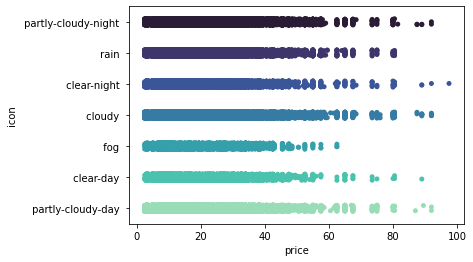

In [21]:
#finding the price range based on weather condition
sns.stripplot(data=uberdata, x='price', y='icon',palette='mako')

<AxesSubplot:xlabel='surge_multiplier', ylabel='source'>

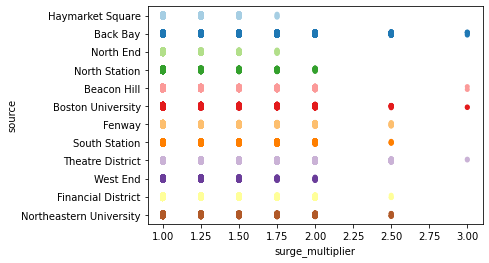

In [22]:
#Strip plot based on Source of destination
sns.stripplot(data=uberdata, x='surge_multiplier', y='source',palette='Paired')

<AxesSubplot:xlabel='surge_multiplier', ylabel='hour'>

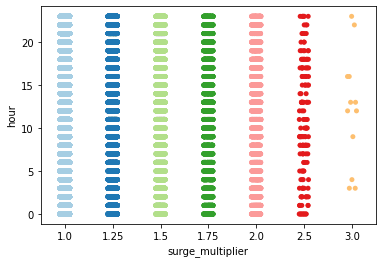

In [23]:
#Strip plot based on hour vs price
sns.stripplot(data=uberdata, x='surge_multiplier', y='hour',palette='Paired')

In [24]:
uberdata['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

In [25]:
from datetime import datetime
timest1 = 1544952608
timest2 = 1543284024
timest3 = 1543818483
timest4 = 1543594384
timest5 = 1544728504
dt1 = datetime.fromtimestamp(timest1)
dt2 = datetime.fromtimestamp(timest2)
dt3 = datetime.fromtimestamp(timest3)
dt4 = datetime.fromtimestamp(timest4)
dt5 = datetime.fromtimestamp(timest5)

print("date_object =", dt1)
print("date_object =", dt2)
print("date_object =", dt3)
print("date_object =", dt4)
print("date_object =", dt5)

date_object = 2018-12-16 04:30:08
date_object = 2018-11-26 21:00:24
date_object = 2018-12-03 01:28:03
date_object = 2018-11-30 11:13:04
date_object = 2018-12-13 14:15:04


We learn that our data is from the year 2018 and only covers the months of November and December

Text(0, 0.5, 'Total count')

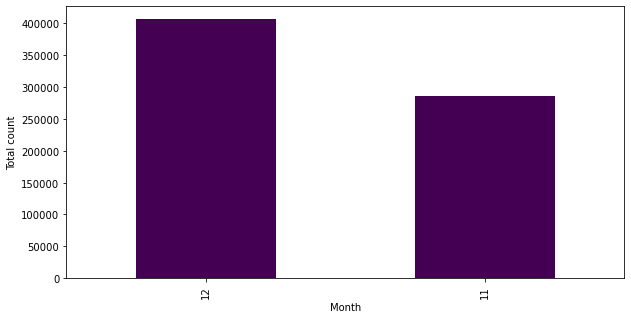

In [27]:
#Bar plot to find the count of rides in November and December
uberdata['month'].value_counts().plot(kind='bar', figsize=(10,5), cmap='viridis')
plt.xlabel("Month")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

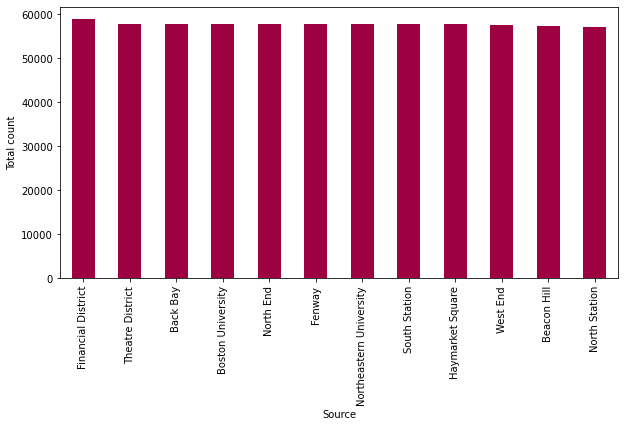

In [28]:
#Bar plot to find the rides based on source of the destinations
uberdata['source'].value_counts().plot(kind='bar', figsize=(10,5), cmap='Spectral')
plt.xlabel("Source")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

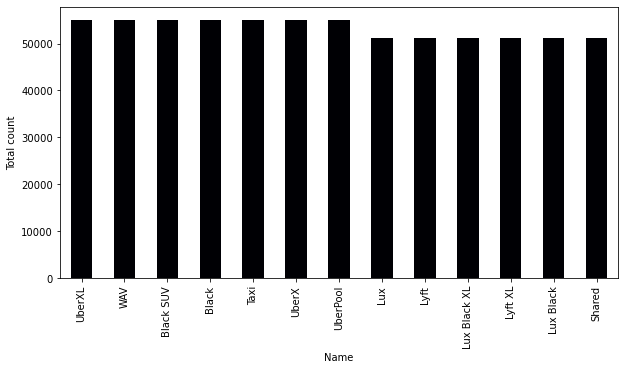

In [29]:
#Bar plot to find the rides based on car type
uberdata['name'].value_counts().plot(kind='bar', figsize=(10,5), cmap='magma')
plt.xlabel("Name")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

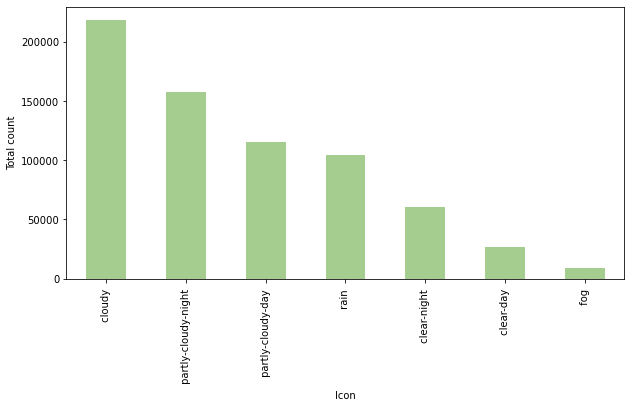

In [30]:
# based on the icon
uberdata['icon'].value_counts().plot(kind='bar', figsize=(10,5), cmap='crest')
plt.xlabel("Icon")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

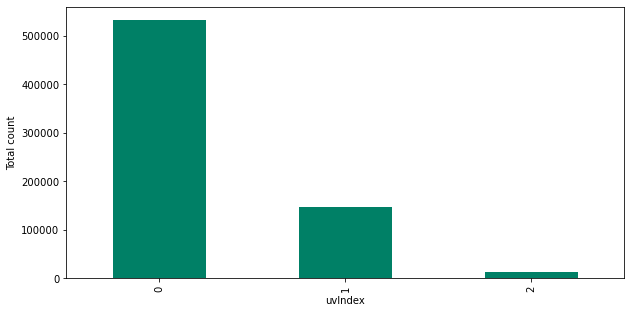

In [31]:
uberdata['uvIndex'].value_counts().plot(kind='bar', figsize=(10,5), cmap='summer')
plt.xlabel("uvIndex")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

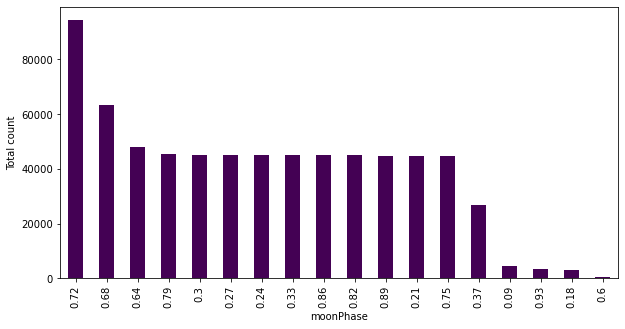

In [32]:
#Total Count based on Moonphase
uberdata['moonPhase'].value_counts().plot(kind='bar', figsize=(10,5), cmap='viridis')
plt.xlabel("moonPhase")
plt.ylabel("Total count")

<AxesSubplot:xlabel='precipProbability', ylabel='Total count'>

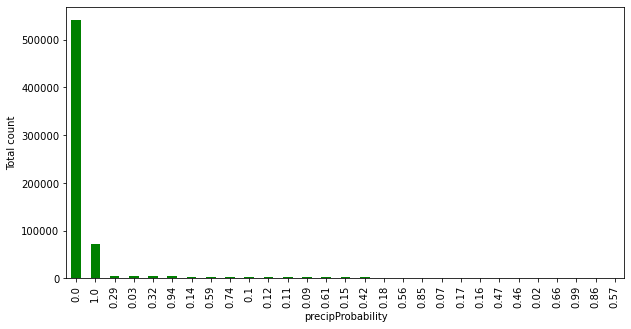

In [33]:
#graph price probability vs total count
plt.xlabel("precipProbability")
plt.ylabel("Total count")
uberdata['precipProbability'].value_counts().plot(kind='bar', figsize=(10,5), color='green')

### Label Encoding

In [34]:

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [35]:
uberdata.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [36]:
uberdata['id']= label_encoder.fit_transform(uberdata['id']) 
uberdata['datetime']= label_encoder.fit_transform(uberdata['datetime']) 
uberdata['timezone']= label_encoder.fit_transform(uberdata['timezone'])
uberdata['destination']= label_encoder.fit_transform(uberdata['destination']) 
uberdata['product_id']= label_encoder.fit_transform(uberdata['product_id'])
uberdata['short_summary']= label_encoder.fit_transform(uberdata['short_summary'])
uberdata['long_summary']= label_encoder.fit_transform(uberdata['long_summary'])


In [37]:
uberdata['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [38]:
uberdata['cab_type']= label_encoder.fit_transform(uberdata['cab_type'])

print("Class mapping of cab_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of cab_type: 
Lyft --> 0
Uber --> 1


In [39]:
uberdata['name']= label_encoder.fit_transform(uberdata['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
Taxi --> 8
UberPool --> 9
UberX --> 10
UberXL --> 11
WAV --> 12


In [40]:
uberdata['source']= label_encoder.fit_transform(uberdata['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [41]:
uberdata['icon']= label_encoder.fit_transform(uberdata['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [42]:
uberdata.dtypes

id                               int32
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int32
timezone                         int32
source                           int32
destination                      int32
cab_type                         int32
product_id                       int32
name                             int32
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                    int32
long_summary                     int32
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [43]:
uberdata.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Filling Null Values

In [44]:
uberdata.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [45]:
uberdata['price'].median()

13.5

In [46]:
uberdata["price"].fillna(10.5, inplace = True) 

In [47]:
uberdata.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [48]:
uberdata['price'].dtype

dtype('float64')

In [49]:
uberdata['price'] = uberdata['price'].astype(int)

In [50]:
uberdata['price'].head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

### RFE (Recursive Feature Elimination)

In [51]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [54]:
from sklearn.feature_selection import RFE

In [55]:
X = uberdata.drop('price', axis = 1)
y = uberdata['price']

In [56]:
X.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [57]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [58]:
X.shape

(693071, 56)

In [59]:
y.shape

(693071,)

Text(0, 0.5, 'Total count')

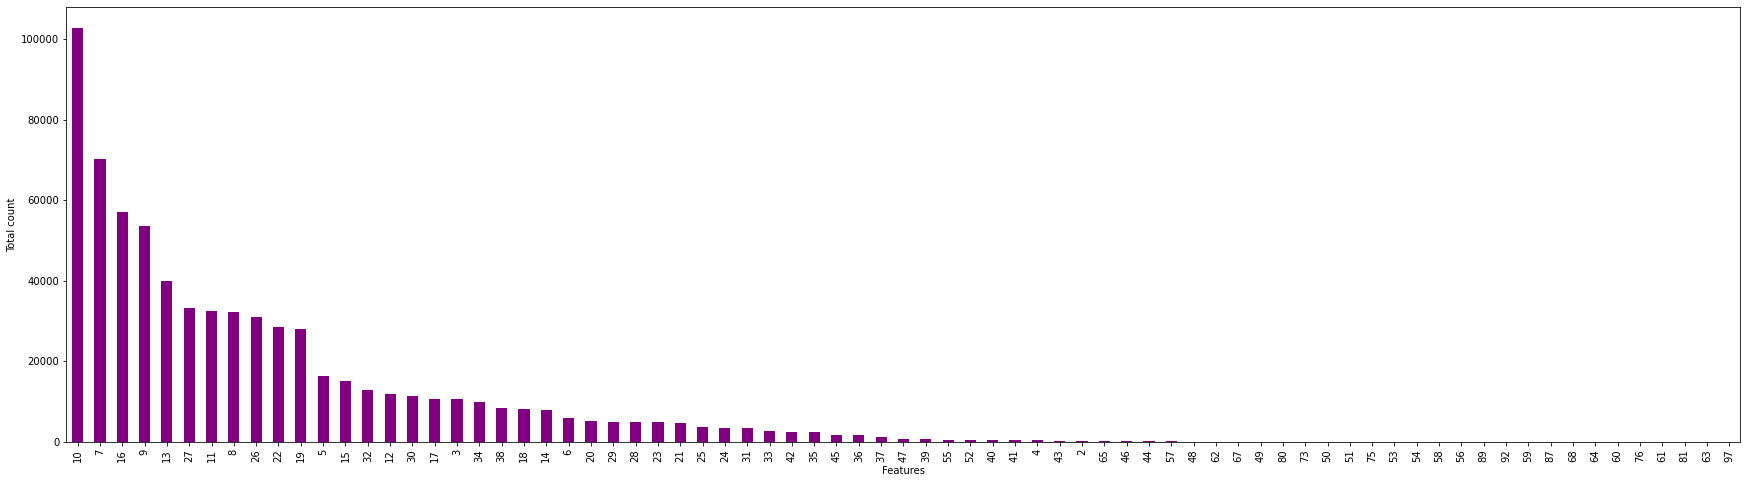

In [60]:
y.value_counts().plot(kind='bar',figsize=(30,8),color='purple')
plt.xlabel("Features")
plt.ylabel("Total count")

#### Training accuracy in 56 features

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
X_train.shape

(554456, 56)

In [63]:
X_test.shape

(138615, 56)

In [64]:
y_train.shape

(554456,)

In [65]:
y_test.shape

(138615,)

In [66]:
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X_train, y_train)

In [67]:
reg.score(X_train, y_train)

0.5210613019979404

#### Training accuracy in 40 features

In [68]:
rfe = RFE(reg, 40, verbose=1)
rfe = rfe.fit(X, y)

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=40 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.


In [69]:
rfe.support_

array([False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [70]:
XXfinal = X[X.columns[rfe.support_]]

In [71]:
#Final Dateset after preprocessing 
XXfinal.head()

,hour,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,...,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,5,7,0,8,7,0.44,1.0,...,10.000,303.8,1544962084,1544994864,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,5,7,0,12,2,0.44,1.0,...,4.786,291.1,1543232969,1543266992,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,5,7,0,7,5,0.44,1.0,...,10.000,315.7,1543319437,1543353364,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,5,7,0,10,4,0.44,1.0,...,10.000,291.1,1543492370,1543526114,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,5,7,0,11,6,0.44,1.0,...,10.000,347.7,1543405904,1543439738,0.72,0.0001,33.10,42.18,29.11,35.75


In [72]:
#Splitting the final data set into test and train
X_train, X_test, y_train, y_test = train_test_split(XXfinal, y, test_size = 0.3, random_state = 10)

In [73]:
X_train.shape

(485149, 40)

In [74]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [75]:
reg1.score(X_train, y_train)

0.5208213396761847

#### Training accuracy in 15 features

In [76]:
rfe = RFE(reg, 15, verbose=1)
rfe = rfe.fit(X, y)

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

In [77]:
XXfinal = X[X.columns[rfe.support_]]

In [78]:
XXfinal.head()

,source,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,dewPoint,temperatureMax,apparentTemperatureMax
0,5,0,8,7,0.44,1.0,42.2148,-71.033,0.0000,0.68,43.68,37.95,32.70,43.68,38.07
1,5,0,12,2,0.44,1.0,42.2148,-71.033,0.1299,0.94,47.30,43.92,41.83,47.30,43.92
2,5,0,7,5,0.44,1.0,42.2148,-71.033,0.0000,0.75,47.55,44.12,31.10,47.55,44.12
3,5,0,10,4,0.44,1.0,42.2148,-71.033,0.0000,0.73,45.03,38.53,26.64,45.03,38.53
4,5,0,11,6,0.44,1.0,42.2148,-71.033,0.0000,0.70,42.18,35.75,28.61,42.18,35.75


In [79]:
X_train, X_test, y_train, y_test = train_test_split(XXfinal, y, test_size = 0.3, random_state = 10,)

In [80]:
X_train.shape

(485149, 15)

In [81]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [82]:
reg1.score(X_train, y_train)

0.5207944456440701

#### Training accuracy in 25 features

In [83]:
rfe = RFE(reg, 25, verbose=1)
rfe = rfe.fit(X, y)

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

In [84]:
XXfinal = X[X.columns[rfe.support_]]

In [85]:
XXfinal.head()

,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,windGust,temperatureHigh,apparentTemperatureHigh,icon,dewPoint,cloudCover,uvIndex,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,5,7,0,8,7,0.44,1.0,42.2148,-71.033,42.34,...,9.17,43.68,37.95,5,32.70,0.72,0,0.1276,43.68,38.07
1,5,7,0,12,2,0.44,1.0,42.2148,-71.033,43.58,...,11.98,47.30,43.92,6,41.83,1.00,0,0.1300,47.30,43.92
2,5,7,0,7,5,0.44,1.0,42.2148,-71.033,38.33,...,7.33,47.55,44.12,1,31.10,0.03,0,0.1064,47.55,44.12
3,5,7,0,10,4,0.44,1.0,42.2148,-71.033,34.38,...,5.28,45.03,38.53,1,26.64,0.00,0,0.0000,45.03,38.53
4,5,7,0,11,6,0.44,1.0,42.2148,-71.033,37.44,...,9.14,42.18,35.75,5,28.61,0.44,0,0.0001,42.18,35.75


In [87]:
X_train, X_test, y_train, y_test = train_test_split(XXfinal, y, test_size = 0.3, random_state = 20,)

In [88]:
X_train.shape

(485149, 25)

In [89]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)
#Y prediction
Y_pred = reg1.predict(X_test)

In [90]:
reg1.score(X_train, y_train)

0.5206802050605615

- As a result of determining the accuracy for k = 56, 40, 25, and 15,
- As a result, we noted that the Linear Regression Model's training accuracy is at its highest when k = 25.

### 25 Columns After RFE

In [91]:
XXfinal.columns

Index(['source', 'destination', 'cab_type', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'temperatureHigh',
       'apparentTemperatureHigh', 'icon', 'dewPoint', 'cloudCover', 'uvIndex',
       'precipIntensityMax', 'temperatureMax', 'apparentTemperatureMax'],
      dtype='object')

In [92]:
XXfinal.shape

(693071, 25)

In [93]:
XXfinal.head()

,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,windGust,temperatureHigh,apparentTemperatureHigh,icon,dewPoint,cloudCover,uvIndex,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,5,7,0,8,7,0.44,1.0,42.2148,-71.033,42.34,...,9.17,43.68,37.95,5,32.70,0.72,0,0.1276,43.68,38.07
1,5,7,0,12,2,0.44,1.0,42.2148,-71.033,43.58,...,11.98,47.30,43.92,6,41.83,1.00,0,0.1300,47.30,43.92
2,5,7,0,7,5,0.44,1.0,42.2148,-71.033,38.33,...,7.33,47.55,44.12,1,31.10,0.03,0,0.1064,47.55,44.12
3,5,7,0,10,4,0.44,1.0,42.2148,-71.033,34.38,...,5.28,45.03,38.53,1,26.64,0.00,0,0.0000,45.03,38.53
4,5,7,0,11,6,0.44,1.0,42.2148,-71.033,37.44,...,9.14,42.18,35.75,5,28.61,0.44,0,0.0001,42.18,35.75


### Droping Unwanted Features

In [94]:
featuresdrop = ['latitude', 'longitude', 'apparentTemperature',
        'precipIntensity', 'humidity', 'windSpeed', 'windGust',
       'temperatureHigh', 'apparentTemperatureHigh', 'dewPoint','precipIntensityMax',
       'temperatureMax', 'apparentTemperatureMax', 'distance', 'cloudCover']
newuberdata = XXfinal.drop(featuresdrop, axis=1)

In [95]:
newuberdata.head()

,source,destination,cab_type,product_id,name,surge_multiplier,temperature,precipProbability,icon,uvIndex
0,5,7,0,8,7,1.0,42.34,0.0,5,0
1,5,7,0,12,2,1.0,43.58,1.0,6,0
2,5,7,0,7,5,1.0,38.33,0.0,1,0
3,5,7,0,10,4,1.0,34.38,0.0,1,0
4,5,7,0,11,6,1.0,37.44,0.0,5,0


### Binning

In [96]:
surge_multiplier_mapping = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4}
newuberdata['surge_multiplier'] = newuberdata['surge_multiplier'].map(surge_multiplier_mapping)

### Final Dataset

In [97]:
newuberdata.head()

,source,destination,cab_type,product_id,name,surge_multiplier,temperature,precipProbability,icon,uvIndex
0,5,7,0,8,7,0.0,42.34,0.0,5,0
1,5,7,0,12,2,0.0,43.58,1.0,6,0
2,5,7,0,7,5,0.0,38.33,0.0,1,0
3,5,7,0,10,4,0.0,34.38,0.0,1,0
4,5,7,0,11,6,0.0,37.44,0.0,5,0


In [98]:
newuberdata.fillna(0, inplace=True)

In [99]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

## 5. Modeling

In [100]:
newuberdata.shape

(693071, 10)

In [101]:
y.shape

(693071,)

In [102]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xx_train, xx_test, yy_train, yy_test = train_test_split(newuberdata, y, test_size = 0.2, random_state = 42)

In [103]:
xx_train.shape

(554456, 10)

In [104]:
xx_test.shape

(138615, 10)

In [105]:
yy_train.shape

(554456,)

In [106]:
yy_test.shape

(138615,)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [108]:
newuberdata.fillna(X_train.mean(), inplace=True)

#### 5.1 Linear regression

In [109]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV


In [110]:
linear = LinearRegression(fit_intercept=True, normalize=False,copy_X=True, n_jobs=None)

linear.fit(xx_train, yy_train)
print('linear_score : ',linear.score(xx_test, yy_test))

linear_score :  0.41973282820736557


#### 5.2 Decision Tree

In [111]:
decision = DecisionTreeRegressor(random_state = 0)  
decision.fit(xx_train , yy_train)
print('Decision_tree_score :',decision.score(xx_test, yy_test))

Decision_tree_score : 0.9350893669242692


#### 5.3 Random Forest

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(xx_train, yy_train)

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


In [113]:
random = RandomForestRegressor(n_estimators = 100, random_state = 0) 
random.fit(xx_train , yy_train) 
print('Random_forest_score :',random.score(xx_test, yy_test))

Random_forest_score : 0.9464565853684954


#### 5.4 Gradient Boosting Regressor

In [114]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)
clf.fit(xx_train, yy_train)


GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [115]:
print('Grdient_Boosting_Regressor_score :',clf.score(xx_test, yy_test))

Grdient_Boosting_Regressor_score : 0.9569897957016174


#### K fold Crossvalidation

In [116]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),xx_test,yy_test,cv=cv)

array([0.41678743, 0.42065507, 0.41595018, 0.41507048, 0.41455486])

## 6. Testing

#### Linear regression

In [117]:
linear.coef_

array([-4.45245258e-02, -1.15930115e-01,  6.73353262e+00,  6.11308643e-01,
       -1.58791992e+00,  5.42235989e+00, -1.32565999e-03, -1.87255254e-02,
        2.67006215e-03,  1.77189404e-02])

In [118]:
prediction = linear.predict(xx_test)
prediction

array([ 7.95285918, 14.29355318, 14.35673938, ...,  8.75857276,
       18.07121757, 22.08682731])

In [119]:
prediction=  prediction.astype(int)

In [120]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   5.291519676802655
MSE :   48.02777477185009
RMAE :   6.930207411892525


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

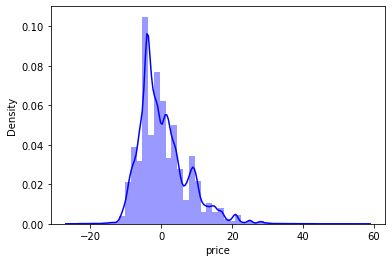

In [121]:
sns.distplot(yy_test - prediction,bins=50,color='blue')

#### Random Forest

In [122]:
predictions = random.predict(xx_test)

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Y')

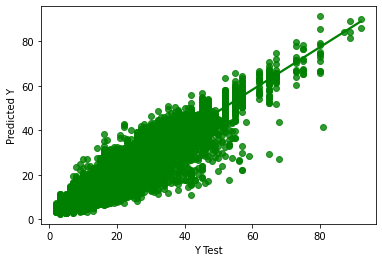

In [123]:
sns.regplot(yy_test,predictions,color='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [124]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(yy_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,predictions)))

MAE :   1.2568165927706472
MSE :   4.406179756198409
RMAE :   2.099090221071598


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

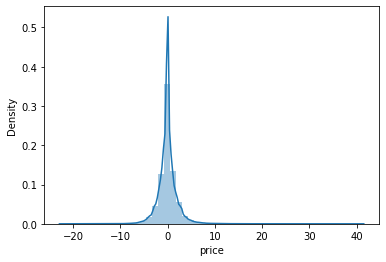

In [125]:
sns.distplot(yy_test - predictions,bins=50)

#### Price prediction function

In [126]:
newuberdata.head()

,source,destination,cab_type,product_id,name,surge_multiplier,temperature,precipProbability,icon,uvIndex
0,5,7,0,8,7,0.0,42.34,0.0,5,0
1,5,7,0,12,2,0.0,43.58,1.0,6,0
2,5,7,0,7,5,0.0,38.33,0.0,1,0
3,5,7,0,10,4,0.0,34.38,0.0,1,0
4,5,7,0,11,6,0.0,37.44,0.0,5,0


In [127]:
def predict_price(name,source,surge_multiplier,icon):    
    loc_index = np.where(newuberdata.columns==name)[0]

    x = np.zeros(len(newuberdata.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1

    return random.predict([x])[0]

In [128]:
pre= random.predict(xx_test)

#### Follow  these instructions before predicting the price:


-  **For cab_name**:  Black SUV --> 0 , Lux --> 1 , Shared --> 2 , Taxi --> 3 , UberPool --> 4 , UberX --> 5


- **For Source**: Back Bay --> 0 , Beacon Hill --> 1 , Boston University --> 2 , Fenway --> 3 , Financial District --> 4 , Haymarket Square --> 5 , North End --> 6 , North Station --> 7 , Northeastern University --> 8 , South Station --> 9 , Theatre District --> 10 , West End --> 11


- **For Surge_multiplier** :Enter Surge Multiplier value from 0 to 4


- **for Icon**:  clear-day  --> 0 , clear-night  --> 1 , cloudy  --> 2 , fog  --> 3 , partly-cloudy-day  --> 4 , partly-cloudy-night  --> 5 , rain  --> 6


predict_price(cab_name , source , surge_multiplier , icon)

In [129]:
predict_price(1 , 3, 2, 0)

C:\Users\Pratik\AppData\Local\Temp/ipykernel_3364/1257577895.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:


34.481666666666676


# Result Metrics

In [130]:

print("Linear Regression Metrics")

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))


print("Decision tree Metrics")

print('MAE :'," ", metrics.mean_absolute_error(yy_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(yy_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,predictions)))




Linear Regression Metrics
MAE :   5.291519676802655
MSE :   48.02777477185009
RMAE :   6.930207411892525
Decision tree Metrics
MAE :   1.2568165927706472
MSE :   4.406179756198409
RMAE :   2.099090221071598
